### In this project, I had to analyze data from a live test to determine the effectiveness of a new mobile app that has been built. The following code allow us to answer on these questions


Will the app lead to increased spending on the part of customers?

How much of an increase in spending do you expect? 

Do you expect the app’s effect on spending to vary by customers’ characteristics?

In [1]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [2]:
## Load the dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\data_app.csv")
df.head(5)

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377


In [3]:
## Check the datatypes and missing values
## Hint - You can evaluate both using a single method
##print(df.isnull().values.any())
##print(df.dtypes)

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


##### Record your observations

#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [4]:
### Before starting with Univariate Analysis, make sure to filter the dataframe to only include one period, either Post = 0 or Post = 1
### This way there won't be any repetitions in demographics data for the same customer

### WRITE CODE FOR FILTERING THE DATAFRAME
post1 = df[df['Post']==1]
post1

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377
...,...,...,...,...,...,...,...,...,...,...
2995,996,0,Male,25,1,1,16,1,6,1488
2996,997,0,Female,51,0,1,54,1,17,4403
2997,998,0,Female,39,1,2,58,1,19,4370
2998,999,0,Male,23,1,4,57,1,20,5020


In [ ]:
### Next let's start making plots to describe each customer characteristic using the above filtered dataframe

In [ ]:
### Hint - If you're unsure what plots/summary statistics to use, inspect the datatypes (categorical or numerical) for the demographic characteristics
### Next, revise your EDA I and EDA II modules to understand which charts are useful for a specific datatype


<Axes: xlabel='Gender', ylabel='count'>

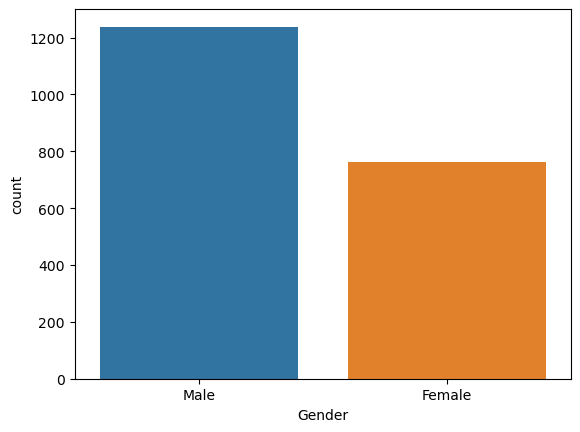

In [5]:
### WRITE CODE FOR ANALYSING "GENDER" VARIABLE
sns.countplot(data = post1, x = 'Gender')

<Axes: xlabel='Nationality', ylabel='count'>

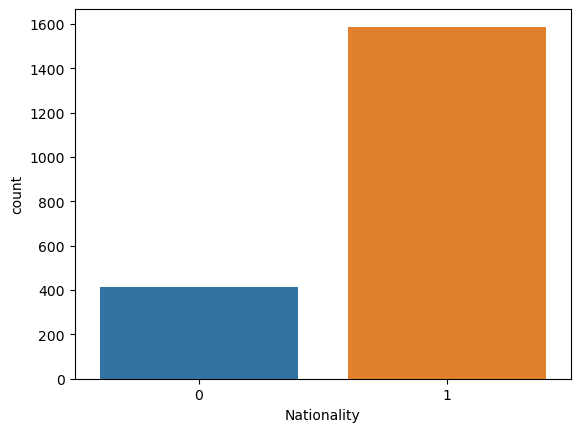

In [6]:
### WRITE CODE FOR ANALYSING "NATIONALITY" VARIABLE
#how many people belong to US nationality(1) and non US nationality(0)
sns.countplot(data = post1, x = 'Nationality')

<Axes: xlabel='Loyalty', ylabel='count'>

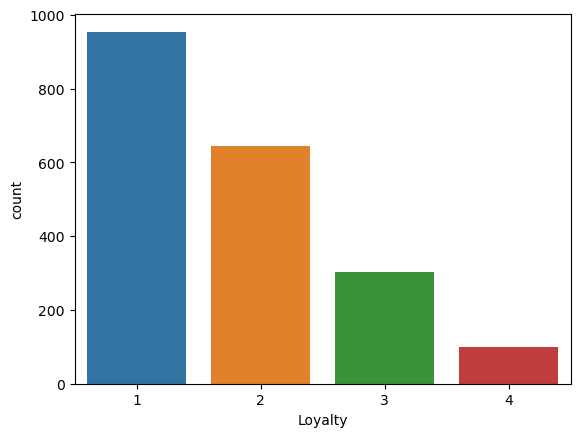

In [7]:
### WRITE CODE FOR ANALYSING "LOYALTY"
#how many people belong to each loyalty category
sns.countplot(data = post1, x = 'Loyalty')

<Axes: xlabel='Age', ylabel='Count'>

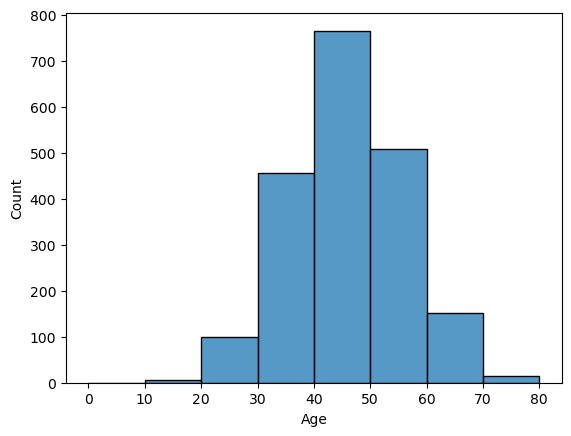

In [8]:
### WRITE CODE FOR ANALYSING "AGE"
# we can see that the largest group of people are between age of 40 and 50) 
bin_start = 0
bin_end = 90
bin_width = 10
sns.histplot(data = post1, x = 'Age', bins = range(bin_start, bin_end, bin_width))


<Axes: xlabel='Tenure', ylabel='Count'>

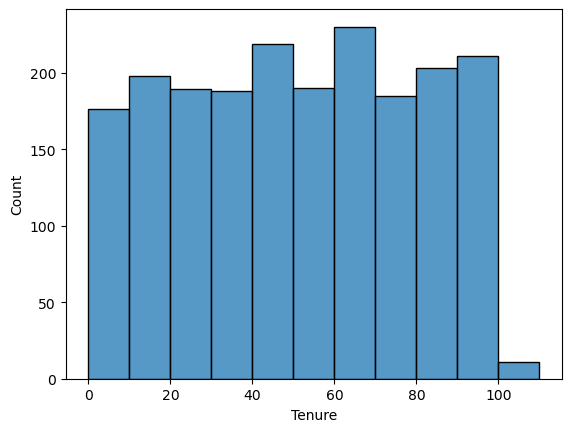

In [9]:
### WRITE CODE FOR ANALYSING "TENURE"
bin_start = 0
bin_end = 120
bin_width = 10
sns.histplot(data = post1, x = 'Tenure', bins = range(bin_start, bin_end, bin_width))

#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [ ]:
### For amount spent and number of bookings, we will get 2 values for the same customer
### One for Post = 0 and another for Post = 1
### You can analyze the data separately for Post = 0 and Post = 1 phases



<Axes: xlabel='Spending', ylabel='Count'>

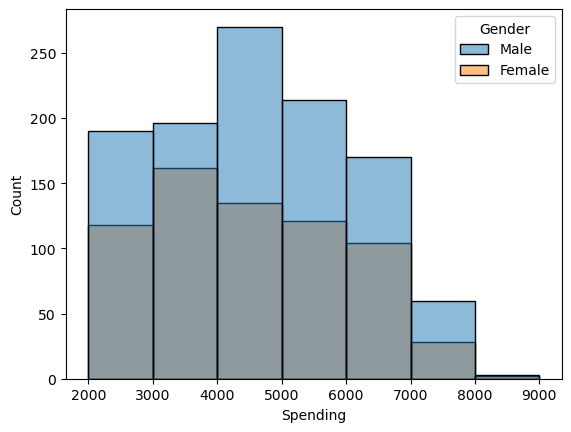

In [10]:
### WRITE CODE FOR ANALYSING "SPENDING"
#amount spent for post = 0
# we can see that people from post = 0 spend between 1000 to 9000.
# Also, men participation is more than the women.
# Most people are spending amount between 4000 to 5000.

post0 = df[df['Post']==0]
post0

bin_start = 2000
bin_end = 10000
bin_width = 1000
sns.histplot(data = post0, x = 'Spending', bins = range(bin_start, bin_end, bin_width), hue='Gender')

<Axes: xlabel='Spending', ylabel='Count'>

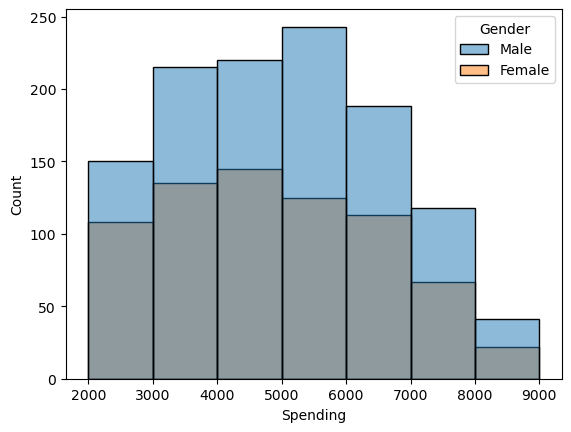

In [11]:
#amount spent for post = 1
# we can see that people from post = 1 spend between 1000 to 9000
# Also, men participation is more than the women.
# Most people are spending amount between 5000 to 6000.


bin_start = 2000
bin_end = 10000
bin_width = 1000
sns.histplot(data = post1, x = 'Spending', bins = range(bin_start, bin_end, bin_width), hue='Gender')

<Axes: xlabel='NumBookings', ylabel='Count'>

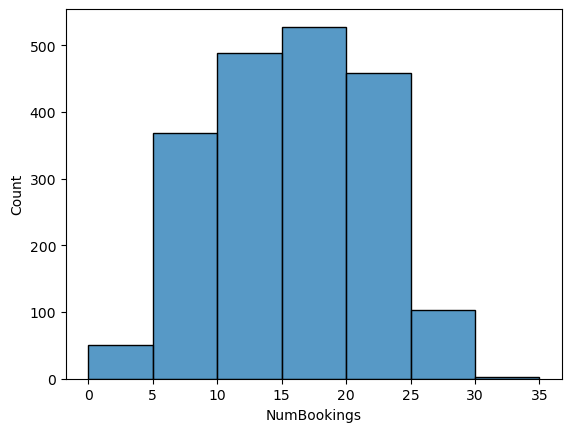

In [12]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"
#Analysis for post = 0
bin_start = 0
bin_end = 40
bin_width = 5
sns.histplot(data = post0, x = 'NumBookings', bins = range(bin_start, bin_end, bin_width))

<Axes: xlabel='NumBookings', ylabel='Count'>

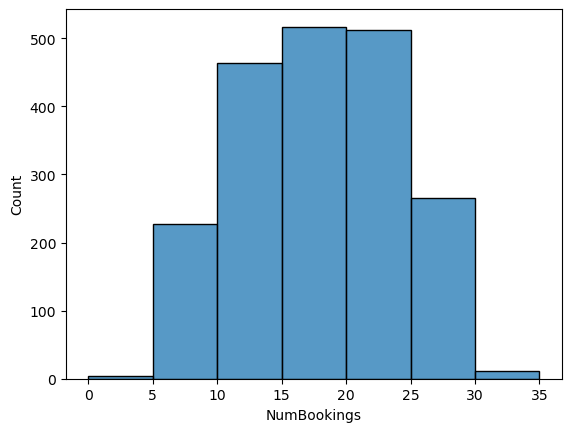

In [13]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"
# Most of customer have done bokings betwen 15 to 25 times.
# Average number of bookings have gone up after app installation

#Analysis for post = 1
bin_start = 0
bin_end = 40
bin_width = 5
sns.histplot(data = post1, x = 'NumBookings', bins = range(bin_start, bin_end, bin_width))

***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

In [ ]:
### In this section, you are free to choose the variables you want to analyse and the number of analyses you want to perform.
### For example, you can peform the following analyses.

### Analyze the relationship Spending and Gender.
### Analyze the relationship between Spending and Age.
### Analyze the relationship between Spending and Loyalty.
### .... and so on.

### As suggested before, you are free to choose the variables for analysis.
### Also, you're free to use the necessary tools (either pivot tables or visualizations or both) to perform the analyses
### However, make sure that you analyze the patterns for Spending and Number of Bookings against minimum 3 customer characteristics

In [13]:
#code for subsetting people from adopt group before they adotped app

app_adopter_before = df[(df['Adopt'] == 1) & (df['Post'] == 0)]
app_adopter_before 

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
1000,1001,1,Male,34,1,2,57,0,14,3976
1001,1002,1,Female,36,1,2,5,0,5,1455
1002,1003,1,Female,43,1,1,12,0,6,1656
1003,1004,1,Male,47,1,1,70,0,18,5148
1004,1005,1,Male,41,1,2,13,0,6,1782
...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,Male,47,1,1,74,0,20,5900
1996,1997,1,Female,42,1,1,47,0,13,4303
1997,1998,1,Male,42,1,1,89,0,21,6804
1998,1999,1,Female,49,0,2,74,0,19,5206


<Axes: xlabel='Gender', ylabel='Spending'>

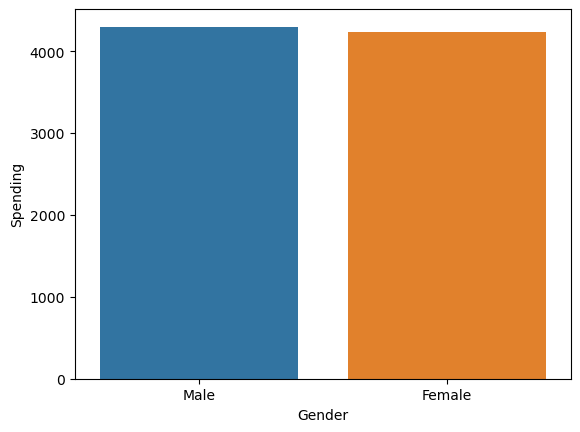

In [14]:
# code for analysing gender vs spending in adopt group before they adotped app
# we can observe that men spend slightly more than woman
sns.barplot(data = app_adopter_before, x = 'Gender', y = 'Spending',ci = None)

In [15]:
#code for subsetting people from adopt group after they adotped app

app_adopter_after = df[(df['Adopt'] == 1) & (df['Post'] == 1)]
app_adopter_after 

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377
...,...,...,...,...,...,...,...,...,...,...
995,1996,1,Male,47,1,1,74,1,21,6678
996,1997,1,Female,42,1,1,47,1,15,4515
997,1998,1,Male,42,1,1,89,1,25,8750
998,1999,1,Female,49,0,2,74,1,23,6923


<Axes: xlabel='Gender', ylabel='Spending'>

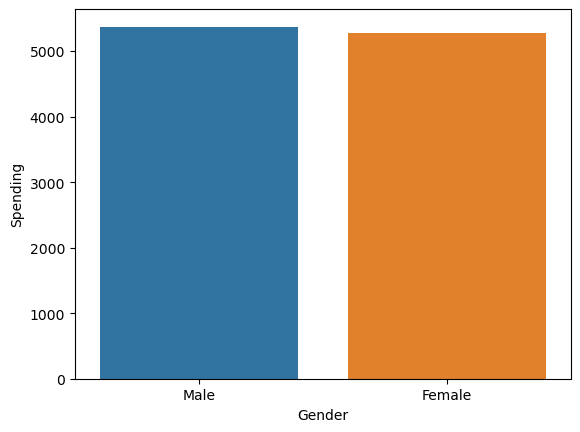

In [16]:
# code for analysing gender vs spending in adopt group after they adotped app
# we can observe that men spend slightly more than woman and that after installing the app spending grew on 1000$

sns.barplot(data = app_adopter_after, x = 'Gender', y = 'Spending', ci = None )

<Axes: xlabel='Age', ylabel='Spending'>

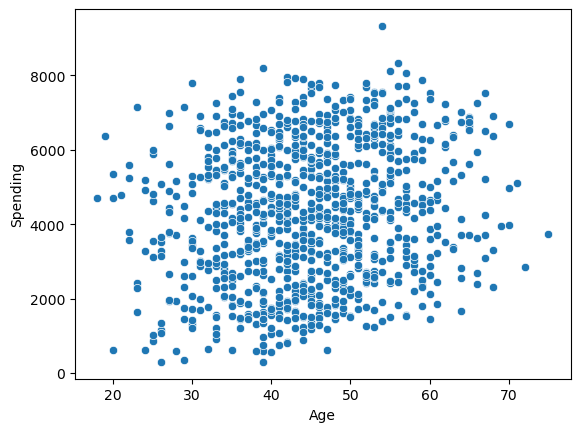

In [17]:
#analysis between spending and age for adopt group before they adotped app
#we can observe that majority of people who spend more money are aproximately between 40 and 50 years old
#sns.set_style(style = 'whitegrid')
sns.scatterplot( data = app_adopter_before, x = 'Age', y = 'Spending', cmap = 'Blues')



<Axes: xlabel='Age', ylabel='Spending'>

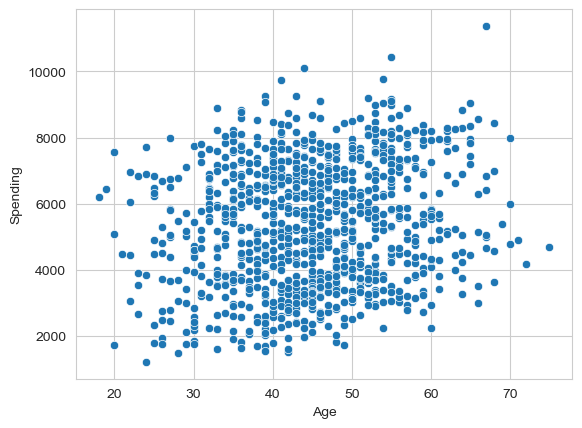

In [18]:
#analysis between spending and age for adopt group after they adotped app
#we can observe that majority of people who spend more money are also aproximately between 40 and 50 years old
sns.set_style(style = 'whitegrid')
sns.scatterplot( data = app_adopter_after, x = 'Age',  y = 'Spending',  cmap = 'Blues')

<Axes: xlabel='Loyalty', ylabel='Spending'>

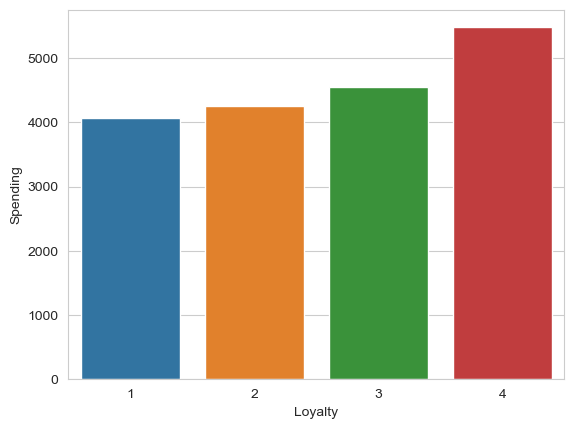

In [19]:
### Analyze the relationship between Spending and Loyalty.

#From this visualisation we can see that people who belong to loyalty group 4(platinum membership) spend most of all
#and people who belong to loyalty group 1(basic membership) spend the least
sns.barplot( data = app_adopter_before, x = 'Loyalty', y = 'Spending', ci=None)

<Axes: xlabel='Loyalty', ylabel='Spending'>

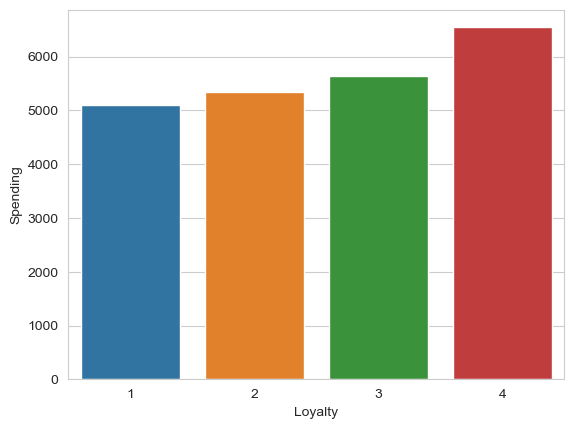

In [20]:
### Analyze the relationship between Spending and Loyalty.

#analysis between spending and loyalty for adopt group after they adotped app
#frrom this visualisation we can see that spendings grew on average 1000 for people with loyalty category 4(platinum)and they 
#still spend the most 

sns.barplot( data = app_adopter_after, x = 'Loyalty', y = 'Spending', ci=None)

- Generate a table of the correlations of all numerical variables of the data set.



<Axes: xlabel='Gender', ylabel='NumBookings'>

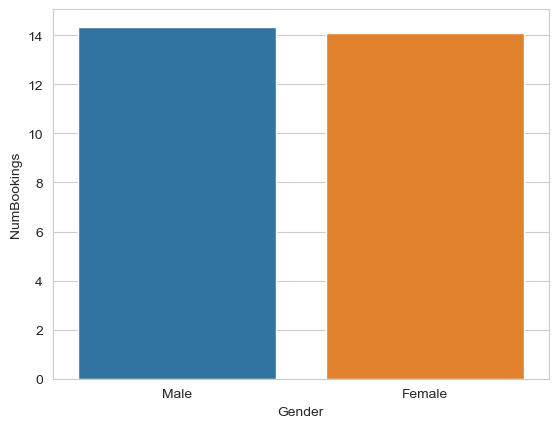

In [21]:
#Analyze the relationship between Number of bookings and Gender.

#we can observe that men do more bookings
sns.barplot( data = app_adopter_before, x = 'Gender', y = 'NumBookings', estimator = 'mean', ci=None)

<Axes: xlabel='Gender', ylabel='NumBookings'>

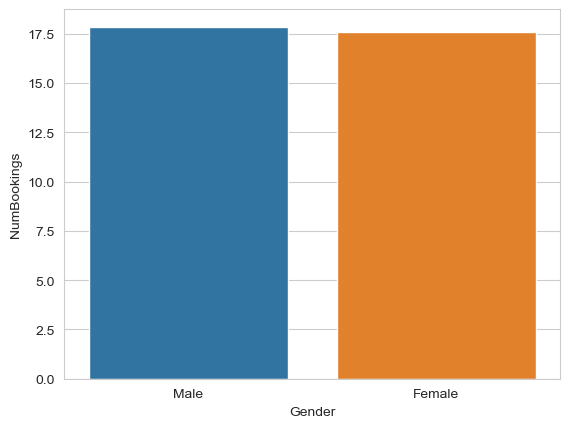

In [22]:
#Analyze the relationship between Number of bookings and Gender.

#we can observe that men do more bookings
sns.barplot( data = app_adopter_after, x = 'Gender', y = 'NumBookings', estimator = 'mean', ci=None)

<Axes: xlabel='Nationality', ylabel='NumBookings'>

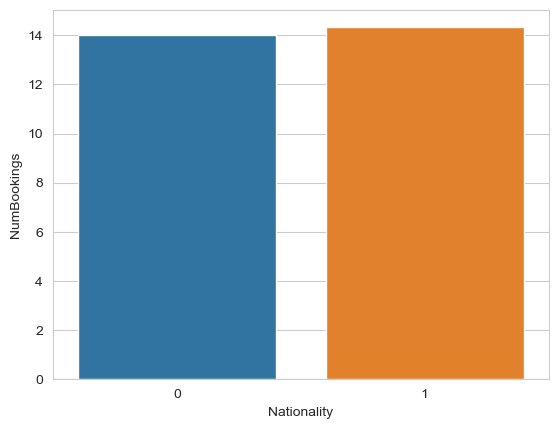

In [23]:
#Analysis for Number of bookings and Nationality

#from this observation we can see that Us citizens make more bookings
sns.barplot(data = app_adopter_before, x = 'Nationality' , y = 'NumBookings', estimator = 'mean', ci = None)

<Axes: xlabel='Nationality', ylabel='NumBookings'>

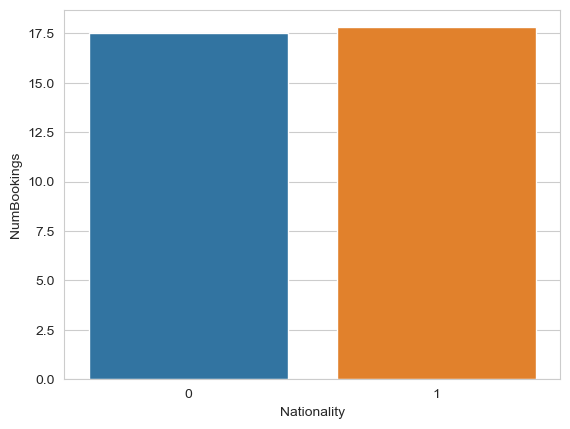

In [24]:
#Analysis for Number of bookings and Nationality

#from this observation we can see that Us citizens make more bookings
sns.barplot(data = app_adopter_after, x = 'Nationality' , y = 'NumBookings', estimator = 'mean', ci = None)

In [ ]:
### Subset the dataframe to only include the numerical variables
### After that you can create a correlation matrix.
### If you want, you can also build a HeatMap, but it's optional.

In [26]:
### Subset the dataframe to only include the numerical variables

all_app_adopter = df[(df['Adopt'] == 1)]
num_var_df = all_app_adopter.loc[0:,['Age', 'Nationality','Loyalty','Tenure','Post','NumBookings']]
num_var_df


,Age,Nationality,Loyalty,Tenure,Post,NumBookings
0,34,1,2,57,1,18
1,36,1,2,5,1,6
2,43,1,1,12,1,9
3,47,1,1,70,1,21
4,41,1,2,13,1,11
...,...,...,...,...,...,...
1995,47,1,1,74,0,20
1996,42,1,1,47,0,13
1997,42,1,1,89,0,21
1998,49,0,2,74,0,19


In [27]:
corr_matrix = num_var_df.corr()
corr_matrix

,Age,Nationality,Loyalty,Tenure,Post,NumBookings
Age,1.000000e+00,4.733655e-02,5.728778e-03,1.216032e-03,3.548393e-15,0.159808
Nationality,4.733655e-02,1.000000e+00,-1.171148e-02,-2.279435e-02,9.315585e-16,0.019424
Loyalty,5.728778e-03,-1.171148e-02,1.000000e+00,-4.515351e-02,-2.652272e-16,0.148413
Tenure,1.216032e-03,-2.279435e-02,-4.515351e-02,1.000000e+00,-5.451876e-16,0.914056
Post,3.548393e-15,9.315585e-16,-2.652272e-16,-5.451876e-16,1.000000e+00,0.275906
NumBookings,1.598082e-01,1.942441e-02,1.484130e-01,9.140562e-01,2.759060e-01,1.000000


<Axes: >

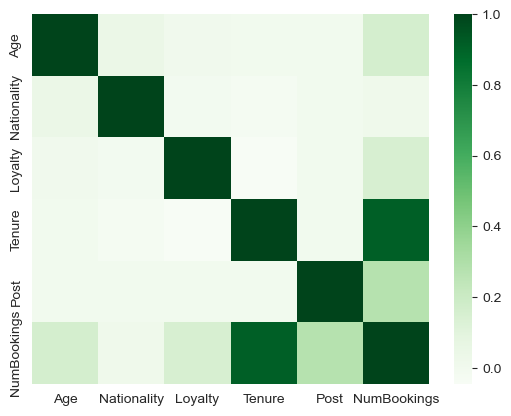

In [28]:
sns.heatmap(corr_matrix, annot=False, cmap = 'Greens')

 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [ ]:
### This task may seem intimidating at first.
### However, using the ttest method pingouin package which you learned in the "Designing Business Experiments" module, you should be able to get all the results directly.

In [29]:
!pip install pingouin
import pingouin as pg

In [30]:

#code for subsetting gender(based on entire dataset)
subset_male = df[df['Gender']=='Male']
subset_female = df[df['Gender']=='Female']

In [31]:
#code for ttest

# spending between men and women is insignificant
pg.ttest(subset_male.Spending,subset_female.Spending)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.396388,3199.526177,two-sided,0.016615,"[25.31, 253.12]",0.078202,0.639,0.670527


#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [32]:
### WRITE CODE FOR CONSTRUCTING A PIVOT TABLE
### Hint - Check the documentation of pivot table
#PART 3 analysis for tretment and control group when post = 1 
### Report the difference between the spending of treatment and control groups in Post = 1 period.
#As we can see from this table the difference in spending between people who used the app and did not use it is 948 


ctgroup1 = df[df['Post'] == 1]
ctgroup1_pivoted = pd.pivot_table(ctgroup1, values='Spending', index=['Adopt'],
                        aggfunc={'Spending': "mean"}, fill_value=0)
ctgroup1_pivoted 




,Spending
Adopt,
0,4388.343
1,5336.304


  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [33]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.
ctgroup1A0 = ctgroup1[ctgroup1['Adopt'] == 0]
ctgroup1A1 = ctgroup1[ctgroup1['Adopt'] == 1]
pg.ttest(ctgroup1A1.Spending, ctgroup1A0.Spending, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.361177,999,two-sided,9.188484e-33,"[797.47, 1098.45]",0.545311,2.199e+29,1.0


***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [ ]:
### This task can be slightly challenging and hence for performing this we have suggested the following approach
### Step 1 - Create 2 separate temporary dataframes, each filtered by Post = 1 and Post = 0 periods
### Step 2 - Merge these two dataframes using the pandas.merge() method based on the "CustomerID" and store this in a new Dataframe
### Step 3 - After merging, you may encounter repeated columns (denoted by a suffix like "_x" & "_y" ). Identify which ones you want to keep
###, and which ones you want to drop. Make sure you keep the Spending columns for both Post = 1 and Post = 0 periods.
### Step 4 - In the new merged Dataframe, create a new column which is the difference between the Spending in Post = 1 and Post = 0 for each customer
### For ease of use, you can name this column as "Diff". This will be useful in the final task of this section

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [34]:
p0 = df[df['Post'] == 0]
p1 = df[df['Post'] == 1]

In [35]:
merged_p0p1 = pd.merge(p0, p1, on = 'CustomerID', suffixes = ('_left', '_right'))
merged_p0p1.head(10)

,CustomerID,Adopt_left,Gender_left,Age_left,Nationality_left,Loyalty_left,Tenure_left,Post_left,NumBookings_left,Spending_left,Adopt_right,Gender_right,Age_right,Nationality_right,Loyalty_right,Tenure_right,Post_right,NumBookings_right,Spending_right
0,1001,1,Male,34,1,2,57,0,14,3976,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,0,5,1455,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,0,6,1656,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,0,18,5148,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,0,6,1782,1,Male,41,1,2,13,1,11,3377
5,1006,1,Male,30,1,2,37,0,9,2610,1,Male,30,1,2,37,1,13,4472
6,1007,1,Male,36,1,2,9,0,7,1890,1,Male,36,1,2,9,1,11,3795
7,1008,1,Male,38,1,1,52,0,14,4494,1,Male,38,1,1,52,1,17,4930
8,1009,1,Male,60,1,2,41,0,13,3614,1,Male,60,1,2,41,1,18,5832
9,1010,1,Male,51,1,1,60,0,16,4624,1,Male,51,1,1,60,1,19,5757


In [36]:
merged_p0p1 = merged_p0p1.drop(columns=['Loyalty_left', 'Tenure_left', 'Age_left', 'Nationality_left', 'NumBookings_left','Adopt_right','Gender_right', 'Loyalty_right', 'Tenure_right', 'Age_right', 'Nationality_right', 'NumBookings_right'])
merged_p0p1

,CustomerID,Adopt_left,Gender_left,Post_left,Spending_left,Post_right,Spending_right
0,1001,1,Male,0,3976,1,5760
1,1002,1,Female,0,1455,1,1830
2,1003,1,Female,0,1656,1,2682
3,1004,1,Male,0,5148,1,6846
4,1005,1,Male,0,1782,1,3377
...,...,...,...,...,...,...,...
1995,996,0,Male,0,1420,1,1488
1996,997,0,Female,0,4395,1,4403
1997,998,0,Female,0,5166,1,4370
1998,999,0,Male,0,4896,1,5020


In [39]:
merged_p0p1['Diff'] = merged_p0p1 ['Spending_right'] - merged_p0p1 ['Spending_left'] 
merged_p0p1


,CustomerID,Adopt_left,Gender_left,Post_left,Spending_left,Post_right,Spending_right,Diff
0,1001,1,Male,0,3976,1,5760,1784
1,1002,1,Female,0,1455,1,1830,375
2,1003,1,Female,0,1656,1,2682,1026
3,1004,1,Male,0,5148,1,6846,1698
4,1005,1,Male,0,1782,1,3377,1595
...,...,...,...,...,...,...,...,...
1995,996,0,Male,0,1420,1,1488,68
1996,997,0,Female,0,4395,1,4403,8
1997,998,0,Female,0,5166,1,4370,-796
1998,999,0,Male,0,4896,1,5020,124


In [ ]:

## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
## Calculate the difference between the above two values. This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))

## After the above, repeat the same steps for Post = 1 period
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
## Calculate the difference between the above two values. This will be Difference1 (or Treatment OEC(After) - Control OEC (After))

### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect.

In [40]:
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
avga0p0 = df[(df['Adopt'] == 0) & (df['Post']==0)]
avga0p0Value = avga0p0['Spending'].mean()
avga0p0Value

4188.753

In [41]:
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
avga1p0 = df[(df['Adopt'] == 1) & (df['Post']==0)]
avga1p0Value = avga1p0['Spending'].mean()
avga1p0Value

4275.593

In [42]:
## Calculate the difference between the above two values.
##This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))

diff0 = avga1p0Value - avga0p0Value 
print(diff0)


86.84000000000015


In [43]:
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
avga0p1 = avga1p0 = df[(df['Adopt'] == 0) & (df['Post']==1)]
avga0p1Value = avga0p1['Spending'].mean()
avga0p1Value

4388.343

In [44]:
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
avga1p1 = avga1p0 = df[(df['Adopt'] == 1) & (df['Post']==1)]
avga1p1Value = avga1p1['Spending'].mean()
avga1p1Value

5336.304

In [45]:
## Calculate the difference between the above two values. 
##This will be Difference1 (or Treatment OEC(After) - Control OEC (After))

diff1 = avga1p1Value - avga0p1Value
print(diff1)

947.9610000000002


In [46]:
### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect.

diff_total = diff1 - diff0
diff_total 

861.1210000000001

- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [ ]:
### Once again, you can peform this task using the pingouin package
### In addition, you can use the "Diff" column from new DataFrame that you created in the first task of this section
### This will help in providing inputs to the ttest method from pingouin package.

In [48]:
adopt0ttest = merged_p0p1[merged_p0p1['Adopt_left']==0]
adopt1ttest = merged_p0p1[merged_p0p1['Adopt_left']==1]

pg.ttest(adopt1ttest.Diff, adopt0ttest.Diff, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.285769,999,two-sided,1.828852e-143,"[805.33, 916.92]",1.354689,3.478e+139,1.0
